<a href="https://colab.research.google.com/github/TutuBraz/metodos_num/blob/main/T4_modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Trabalho T4 - Integração Numérica e EDOs

### Métodos numéricos computacionais

#### 2º Semestre de 2022

**Prof. Tiago Buriol**

**Nomes dos integrantes do grupo:** Arthur Braz Santos

In [139]:
import numpy as np
import matplotlib.pyplot as plt
from math import e
from scipy.integrate import quad


### Questão 1 
Os seguintes dados foram obtidos a partir de uma distribuição normal:


x   | -2,0  | -1,5  | -1,0  | -0,5  |  0,0  |  0,5  |  1,0  |  1,5  |  2,0  | 
----|-------|-------|-------|-------|-------|-------|-------|-------|-------|
f(x)|0,05399|0,12952|0,24197|0,35207|0,39894|0,35207|0,24197|0,12952|0,05399| 


Use a regra dos trapézios e a regra 1/3 de simpson para integrar esses dados.

In [ ]:
#Regra dos trapezios
x0 = -2.0
xn = 2.0
n = 8
h = (xn-x0)/n
x = np.linspace(x0,xn,n+1)
y = [0.05399,	0.12952,	0.24197,	0.35207,	0.39894,	0.35207,	0.24197,	0.12952,	0.05399]

print(x)
print(y)

regra_gen = (h/2)*(y[0]+2*np.sum(y[1:n])+y[n])
print(regra_gen)

[-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2. ]
[0.05399, 0.12952, 0.24197, 0.35207, 0.39894, 0.35207, 0.24197, 0.12952, 0.05399]
0.9500250000000001


In [ ]:
#Regra 1/3 de Simpson
I = (h/3)*(y[0] + 4*np.sum(y[1:n:2]) + 2*np.sum(y[2:n:2]) +y[n])
print(I)

0.9544099999999999


### Questão 2


A função densidade de probabilidade da distribuição normal é $f(t)=(1/ \sqrt{2\pi})e^{-t^2/2}$ e a distribuição cumulativa é a função definida pela integral $\Phi(x)=\frac{1}{2}+\frac{1}{\sqrt{2\pi}} \int_0^x e^{-t^2/2} dt$. Calcule valores para $\Phi(0,5)$, $\Phi(1,0)$, $\Phi(1,5)$, $\Phi(2,0)$, $\Phi(2,5)$ e $\Phi(3,0)$ que tenham cinco casas decimais de precisão. Plote o gráfico da função $\Phi(x)$ para os valores calculados.


valores de phi = [0.69146, 0.84134, 0.93319, 0.97725, 0.99379, 0.99865]


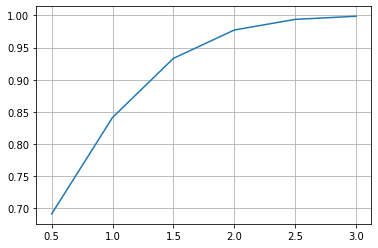

In [ ]:
#Valores
x = np.linspace(0.5,3,6)

#Integral
phi =lambda x: (1/2)+(1/np.sqrt(2*np.pi)) * quad(lambda x: e**((-x**2)/2),0,x)[0]

#valores
valores = list((map(phi,x)))
valores = [round(x,5) for x in valores ]
print(f'valores de phi = {valores}')

#plot
plt.plot(x,valores)
plt.grid()
plt.show()

In [ ]:
phi(3)

In [ ]:
#Integral
f = lambda x: (1/2) + ((1/sqrt(2*np.pi)))

In [ ]:
x0 = 1.0
xn = 4.0
n = 4
h = (xn-x0)/n
f = lambda x: np.sqrt(x)
x = np.linspace(x0, xn, n+1)
y = f(x)
print(x)
print(np.round(y,4))

It = (h/2)*(y[0]+2*np.sum(y[1:n])+y[n])
print(np.round(It,4))

[1.   1.75 2.5  3.25 4.  ]
[1.     1.3229 1.5811 1.8028 2.    ]
4.6551


### Questão 3
Caso seja possível, obtenha as primitivas das seguintes funções (use os exemplos desenvolvidos em aula com `sympy` ou pesquise outras formas):

- $f_1(x)=x^2e^{x^2}$
- $f_2(x)=sen(x^2)$
- $f_3(x)=\sqrt{1-x^4}$

Então, use integração numérica para calcular as seguintes integrais definidas:

- $I_1(x)= \int_0^1 x^2e^{x^2} dx$
- $I_2(x)= \int_0^2 sen(x^2) dx$
- $I_3(x)= \int_0^1 \sqrt{1-x^4} dx$

Use integração numérica para obter aproximações com pelo menos quatro casas decimais de precisão. Comente o que você observou ao resolver essa questão.

### Questão 4

Funções periódicas, podem ser escritas como uma soma infinita de funções trigonoméricas  seno e cosseno conhecida como série de Fourier. A representação em série de Fourier de uma função periódica $f$ é dada por:

$$f(x)= \frac{A_0}{2}+\sum_{n=1}^{\infty}A_n\ cos{(nx)} + B_n\ sen{(nx)}$$

Mostra-se que os valores de $A_n$ e $B_n$ podem ser calculados pelas seguintes fórmulas:

$$A_n= \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) cos{(nx)}\ dx$$

$$B_n= \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) sen{(nx)}\ dx$$

As séries de Fourier são usadas para aproximar algumas funções particularmente desagradáveis, como a função degrau, por exemplo, e formam a base de muitas aplicações de engenharia, como o processamento de sinais.

Use integração numérica para obter uma aproximação por série de Fourier da função $f(x)=sen(e^x)$ no intervalo $(-3,3)$ com no mínimo 5 termos da série. Plote o gráfico da função $f$ e da função aproximadora.

Como referência para o desenvolvimento dessa questão, a figura abaixo apresenta o resultado esperado para asaproximações usando 2 termos da série e usando 20 termos da série.

<figure>
  <img src="fourier.png" style="width:70%">
</figure>


In [140]:
x0 = -3.0; xn = 3.0 
f = lambda x: np.sin(e**x)

for n in [4,20]:
    h = (xn-x0)/n
    x = np.linspace(x0, xn, n+1) 
    y = f(x)
    # Regra 3/8 de Simpson usando funções do numpy
    I = (3*h/8)*(y[0] + 3*np.sum(y[1:n-1:3]+y[2:n:3]) +\
                 2*np.sum(y[3:n:3])+ y[-1])
    print ("n=",n,", I=",I)

n= 4 , I= 1.2574614787467475
n= 20 , I= 1.6340856350779338


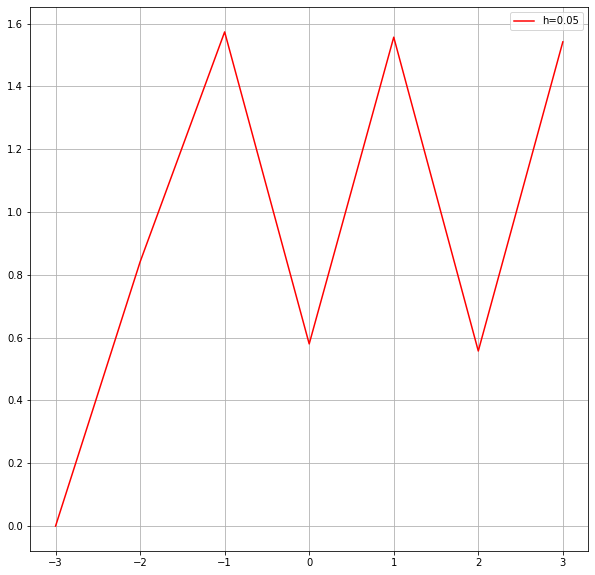

In [145]:
h0 = 1
x0 = -3.0; xn = 3.0 

# criamos a lista com os pontos xi h0 passos
X0 = np.arange(x0, xn+h0, h0) 
#print ("pontos xi para h0:", X0)



# lista com y0, a ser preenchida pelos yi
Y = [0]                  
Z = [0]
# entramos com f(x)
w = lambda x: np.sin(e**x)

# laço para ir calculando os yi e preenchendo a lista
for n in range(6):
    Y.append(Y[n] + w(Y[n])*h0 ) #Y[-1] é o último yi calculado



# imprime

s = lambda t: ((1/5)*t*e**(3*t)) - ((1/25)*e**(3*t)) + (1/25)*e**-(2*t)


# plota
plt.figure(figsize=(10,10))
plt.plot(X0, Y, "r-")
plt.legend(['h=0.05','h=0.1','valor real'])
plt.grid()
plt.show()



### Questão 5
Usando o método de Euler, determine uma solução aproximada para o PVI dado por

$$ \begin{cases} 
y'= te^{3t}-2y \\
y(0)=0
\end{cases}$$

com $t \in [0,1]$, $h=0,1$ e $h=0,05$. Faça o gráfico das soluções aproximadas e compare com a solução exata $y(t)= \frac{1}{5}te^{3t}-\frac{1}{25}e^{3t}+\frac{1}{25}e^{-2t}$.


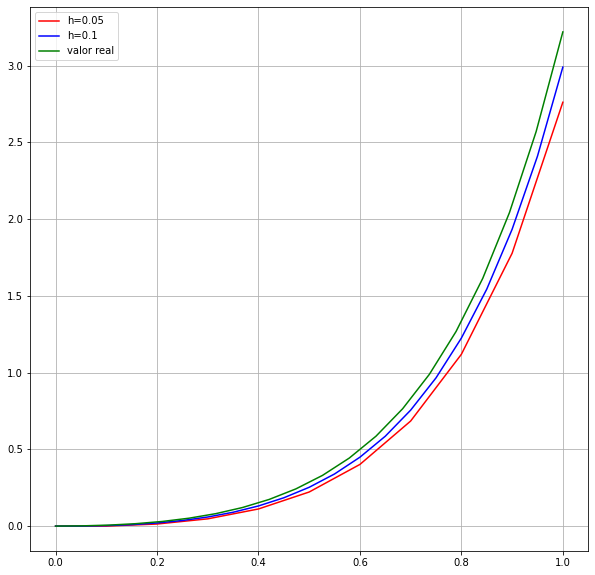

In [ ]:
h0 = 0.1 #passo
h1 = 0.05
x0 = 0.0
xn = 1.0

# criamos a lista com os pontos xi h0 passos
X0 = np.arange(x0, xn+h0, h0) 
#print ("pontos xi para h0:", X0)

# criamos a lista com os pontos xi h1 passos
X1 = np.arange(x0, xn+h1, h1) 
#print ("pontos xi para h1:", X1)

# lista com y0, a ser preenchida pelos yi
Y = [0]                  
Z = [0]
# entramos com f(x,y)
w = lambda t,y: t*e**(3*t)-2*y

# laço para ir calculando os yi e preenchendo a lista
for n in range(len(X0)-1):
    Y.append(Y[n] + w(X0[n],Y[n])*h0 ) #Y[-1] é o último yi calculado

# laço para ir calculando os Zi e preenchendo a lista
for n in range(len(X1)-1):
    Z.append(Z[n] + w(X1[n],Z[n])*h1 ) #Z[-1] é o último yi calculado

# imprime
#print("pontos yi para h0:", Y)
#print("pontos yi para h1", Z)
s = lambda t: ((1/5)*t*e**(3*t)) - ((1/25)*e**(3*t)) + (1/25)*e**-(2*t)
Xe = np.linspace(x0,xn, 20)
Ye = s(Xe)


# plota
plt.figure(figsize=(10,10))
plt.plot(X0, Y, "r-", X1, Z, "b-",Xe, Ye, 'green')
plt.legend(['h=0.05','h=0.1','valor real'])
plt.grid()
plt.show()


COMENTÁRIO: Quanto maior o número de passos mairo será a precisão.